<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/334_training_YOLO_V8_EM_platelets_converted_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [2]:
from IPython.display import Image

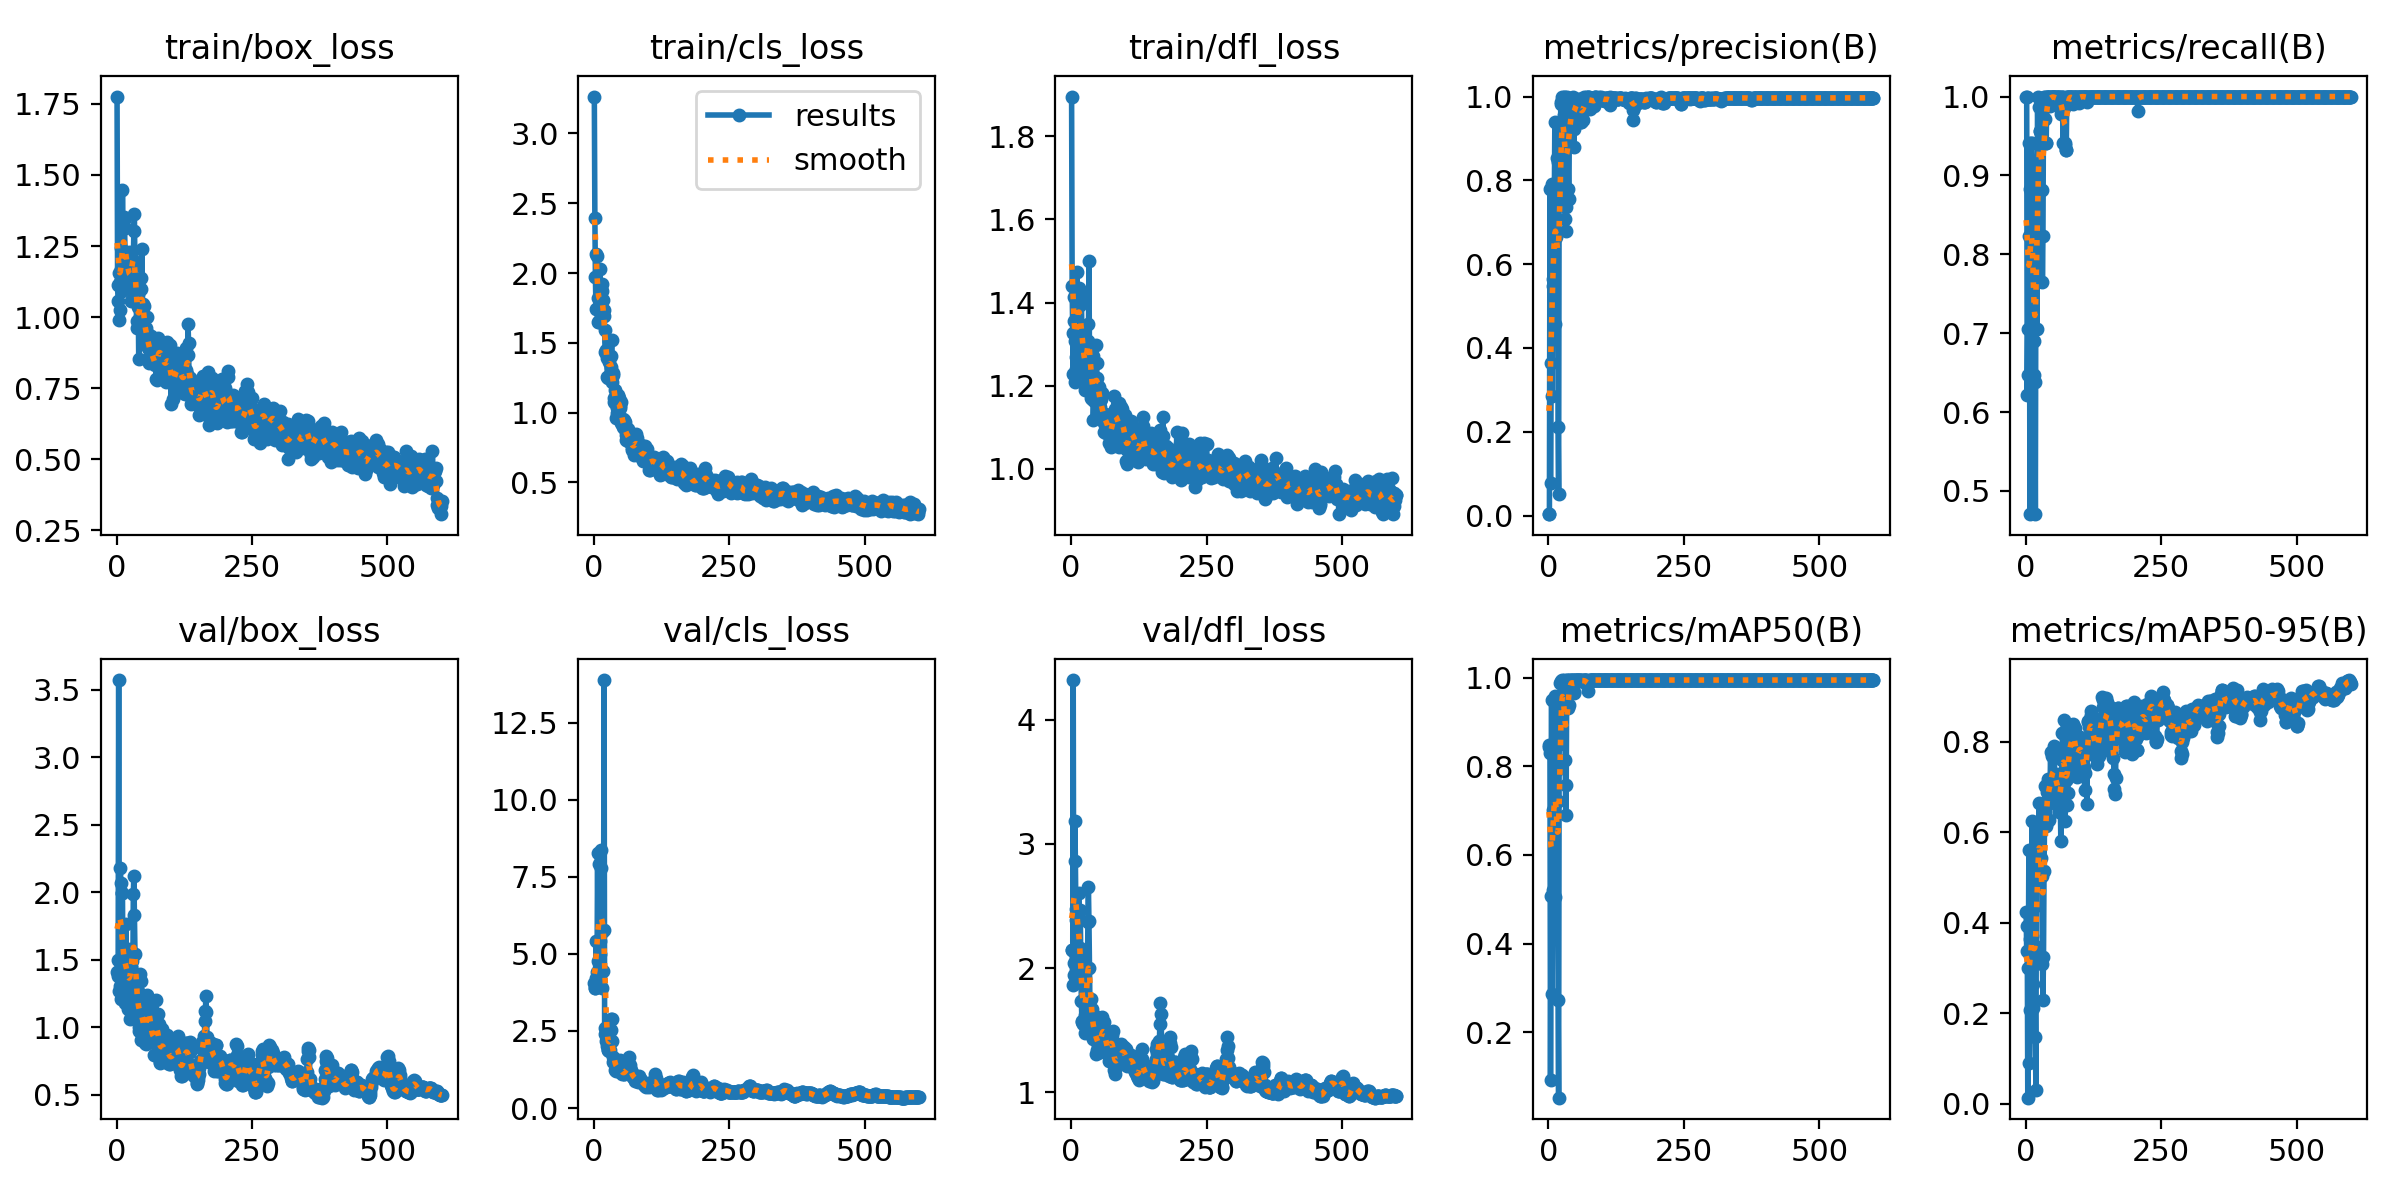

In [4]:
Image("/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_obj_detect/results.png")

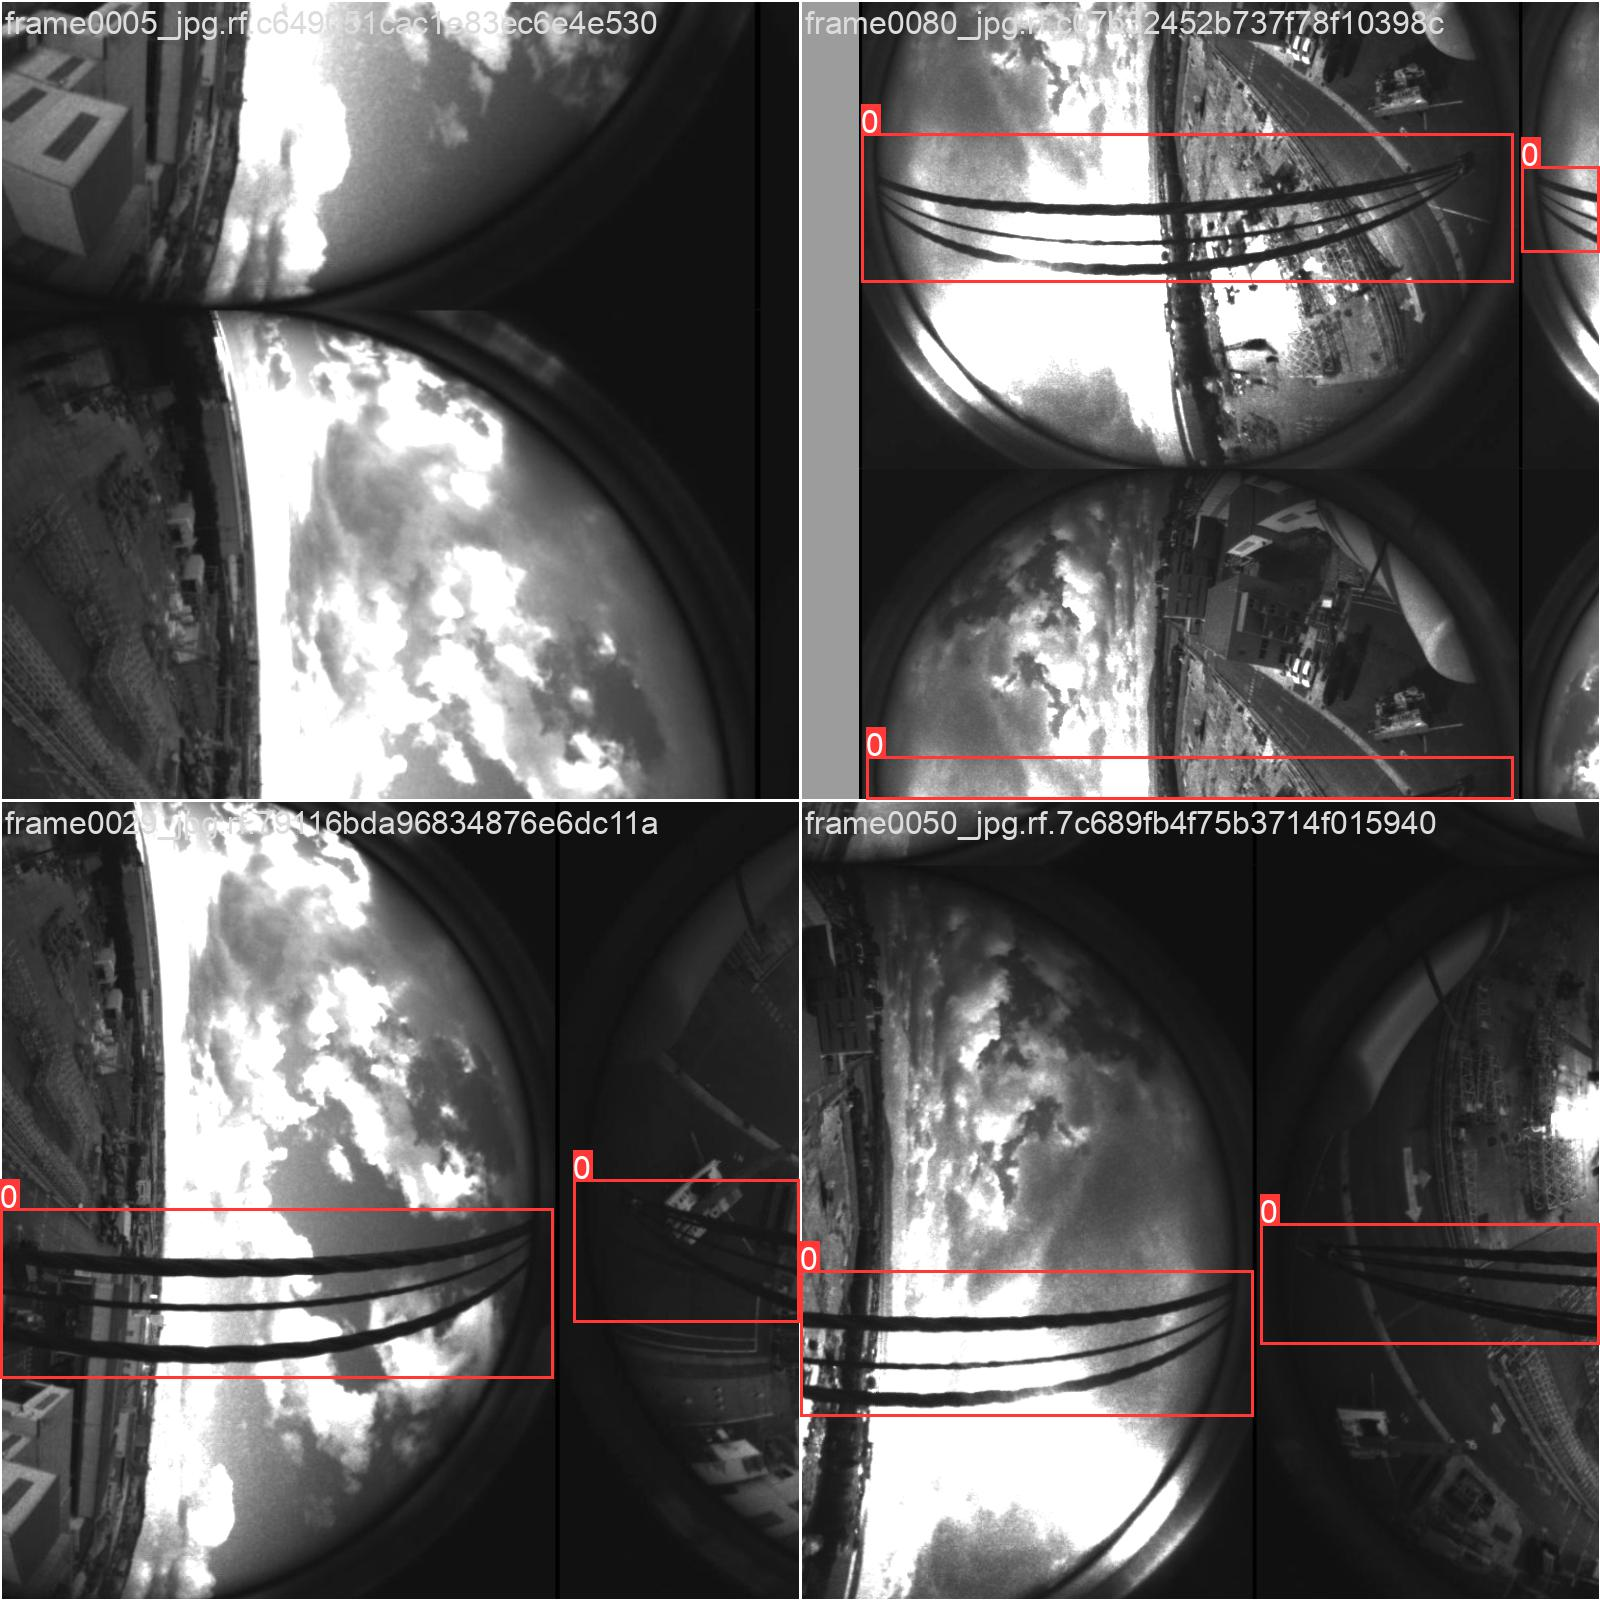

In [5]:
Image(filename='/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_obj_detect/train_batch0.jpg', width=900)

**Run inference**

Now that our model is trained, we can use it for inference.

Load an image and perform inference (segmentation).


image 1/1 /media/aisl2/aisl_data/code_ws/yolo_v8/detect_more_yolov8/valid/images/frame0217_jpg.rf.a690b412c054dec12818aff3187b16da.jpg: 800x800 1 rope, 58.6ms
Speed: 2.5ms preprocess, 58.6ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


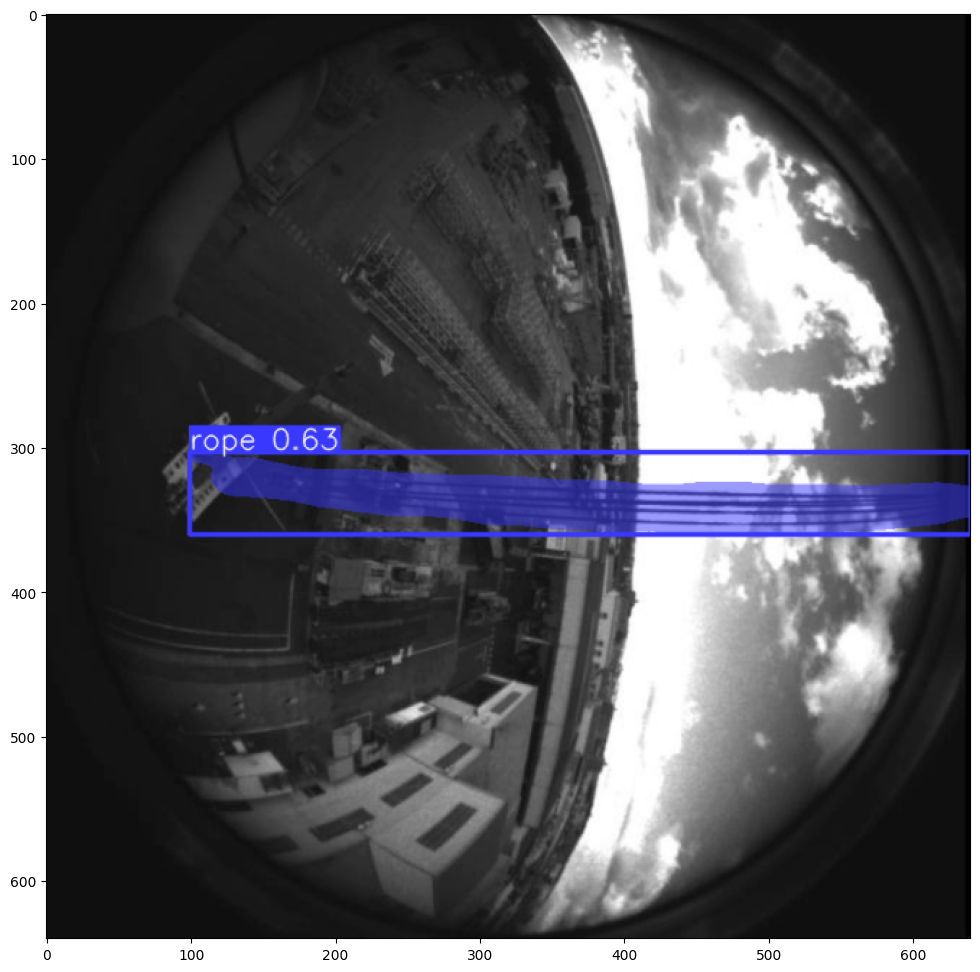

In [4]:
# my_new_det_model = YOLO('/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_obj_detect/weights/best.pt')
my_new_det_model = YOLO('/media/aisl2/aisl_data/code_ws/yolo_v8/detect_more_yolov8/results/600_epochs-/weights/best.pt')
new_image = '/media/aisl2/aisl_data/code_ws/yolo_v8/detect_more_yolov8/valid/images/frame0217_jpg.rf.a690b412c054dec12818aff3187b16da.jpg'
detection_result = my_new_det_model.predict(new_image)  #Adjust conf threshold
detection_result_array = detection_result[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(detection_result_array)

The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

segment

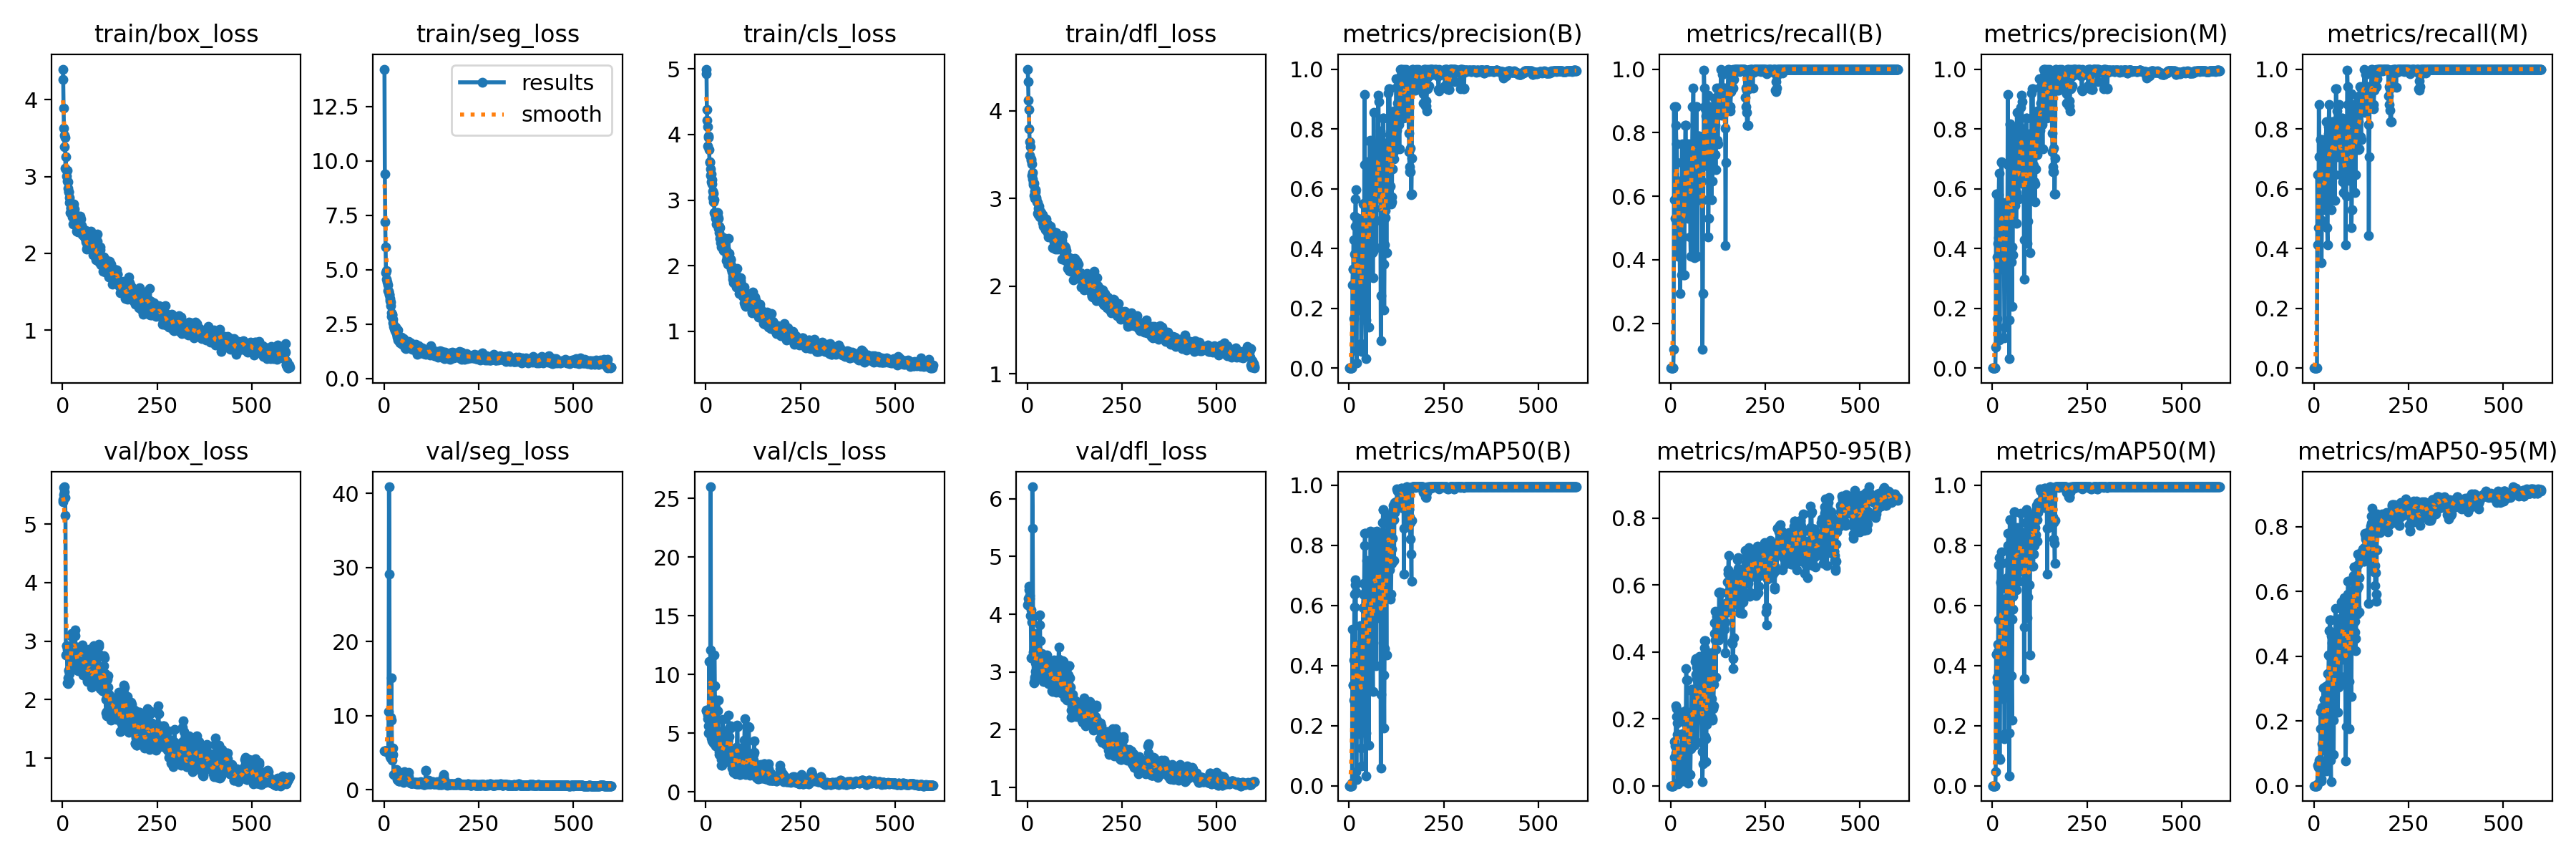

In [12]:
from IPython.display import Image
Image("/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_seg/results.png")

In [5]:
Image(filename='/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_seg/train_batch0.jpg', width=900)

FileNotFoundError: [Errno 2] No such file or directory: '/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_seg/train_batch0.jpg'


image 1/1 /media/aisl2/aisl_data/code_ws/yolo_v8/detect_more_yolov8/valid/images/frame0217_jpg.rf.a690b412c054dec12818aff3187b16da.jpg: 800x800 1 rope, 73.0ms
Speed: 3.0ms preprocess, 73.0ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)


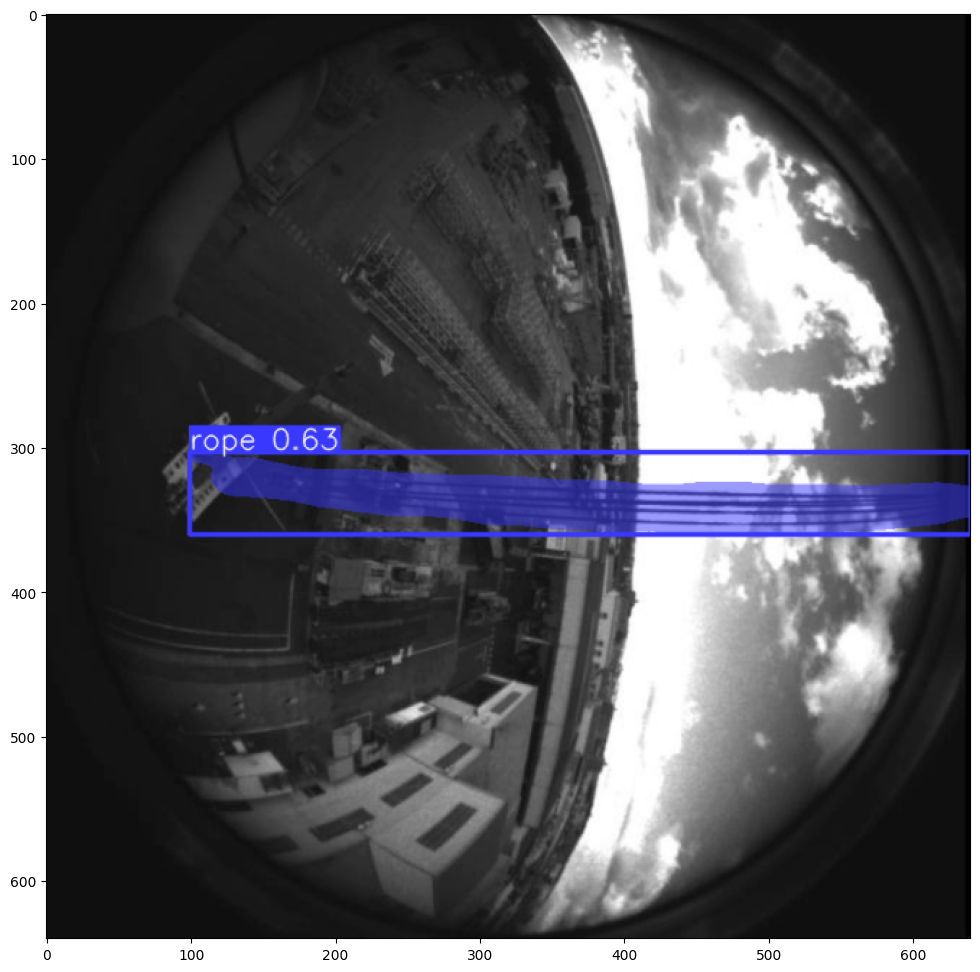

In [8]:
# instance_model = YOLO('/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_seg/weights/best.pt')
# new_image = '/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/train/images/frame0000_jpg.rf.a7ae120001e29a32c98159bf1e203c75.jpg'

instance_model = YOLO('/media/aisl2/aisl_data/code_ws/yolo_v8/detect_more_yolov8/results/600_epochs-/weights/best.pt')
new_image = '/media/aisl2/aisl_data/code_ws/yolo_v8/detect_more_yolov8/valid/images/frame0217_jpg.rf.a690b412c054dec12818aff3187b16da.jpg'

instance_result = instance_model.predict(new_image)  #Adjust conf threshold
instance_result_array = instance_result[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(instance_result_array)

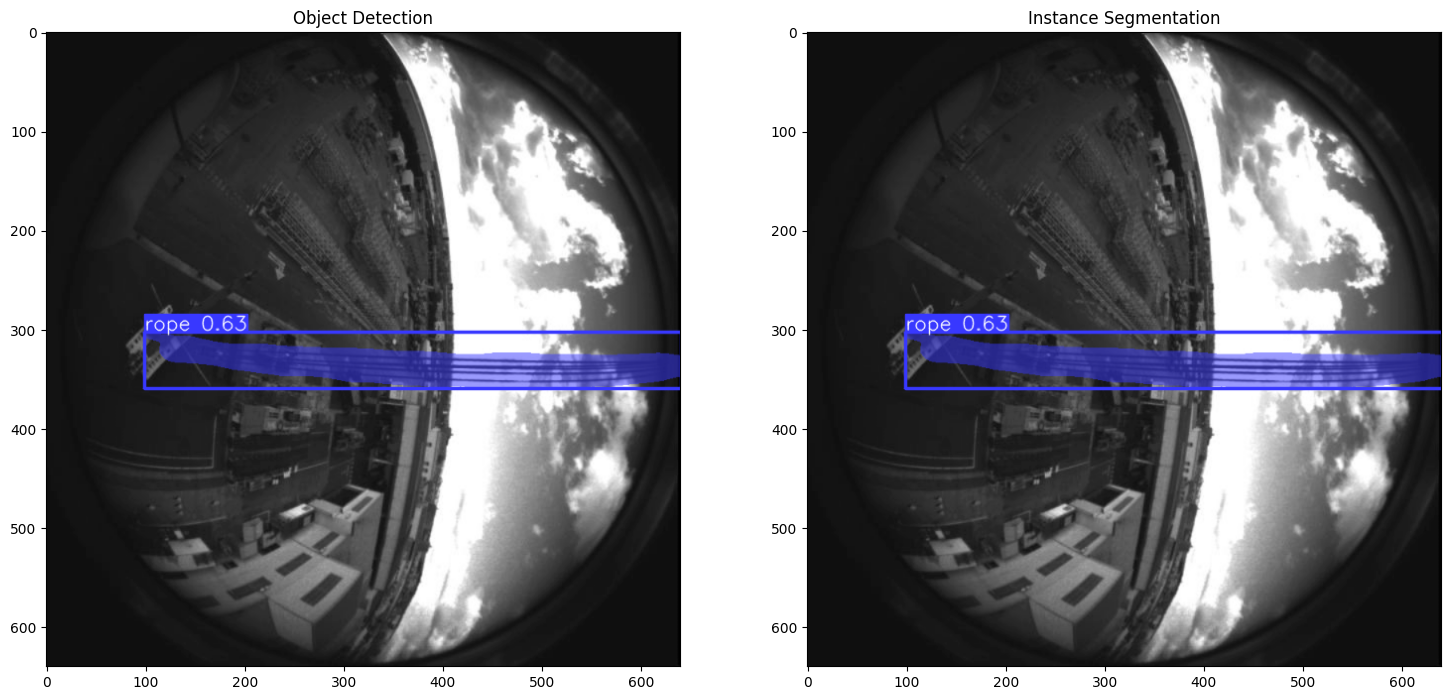

In [9]:
detection_result_array = detection_result[0].plot()
instance_result_array = instance_result[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

**Extracting bounding boxes and segmented masks from the result**

**Extracting bounding polygons** <p>
Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels)

**Extracting segmented masks**


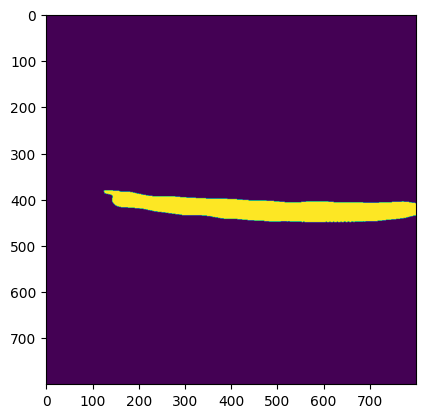

In [10]:
new_result =instance_result[0]
new_result.masks.xyn
extracted_masks = new_result.masks.data
extracted_masks.shape
masks_array = extracted_masks.cpu().numpy()
plt.imshow(masks_array[0])

# **YOLOv8 Video Inference**

**Step #2: Load Data and Model**

First, we need to load data into a Python program. We'll also need to load a model for use in inference. Create a new Python file and add the following code:

In [37]:
import supervision as sv
import numpy as np
from ultralytics import YOLO

VIDEO_PATH = "/media/aisl2/aisl_data/backup/catkin_ws/src/data/kobelco_exp_2023/3_varying_speed_and_boom_Angle_at_the_start_of_cycle/output_video1.mp4"

model = YOLO("/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/600_epochs_model_obj_detect/weights/best.pt")

video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

In [38]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]
    
    detections = sv.Detections.from_yolov8(results)

    box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

    return frame

sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)


0: 1216x1280 4 ropes, 122.8ms
Speed: 8.0ms preprocess, 122.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1216, 1280)


AttributeError: type object 'Detections' has no attribute 'from_yolov8'